#  <center> Problem Set 5 <center>
<center> Spring 2021 <center>
<center> 3.100/3.322, 10.402/10.602, 20.301/20.401 <center>
<center> Due:10 pm ET on Thursday, May 6, 2021 <center>

# Part 1 Classifying  Steel  Surface  Defects

In [5]:
import os 
import glob 
import PIL
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://github.com/wwang2/ML4MolEng/blob/master/psets/ps5/neu_surfae_defect_jpg.tar.gz?raw=true
!mv neu_surfae_defect_jpg.tar.gz?raw=true  neu_surfae_defect_jpg.tar.gz
!tar -xf neu_surfae_defect_jpg.tar.gz

--2021-04-25 16:57:35--  https://github.com/wwang2/ML4MolEng/blob/master/psets/ps5/neu_surfae_defect_jpg.tar.gz?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/wwang2/ML4MolEng/raw/master/psets/ps5/neu_surfae_defect_jpg.tar.gz [following]
--2021-04-25 16:57:35--  https://github.com/wwang2/ML4MolEng/raw/master/psets/ps5/neu_surfae_defect_jpg.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps5/neu_surfae_defect_jpg.tar.gz [following]
--2021-04-25 16:57:35--  https://raw.githubusercontent.com/wwang2/ML4MolEng/master/psets/ps5/neu_surfae_defect_jpg.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubuserco

### 1.1 Buil Image datasets and dataloaders

In [3]:
# get all image file paths 
files = glob.glob(os.path.join('neu_surfae_defect_images', "*.jpg"))

neu_surfae_defect_images/Pa_277.jpg


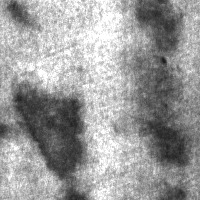

In [4]:
# Visualize images 
idx = 30
img = Image.open(files[idx])
print(files[idx])
img


In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision.io import read_image
import torchvision.transforms as transforms

# dictionary labels 
label_dict = {
'Cr': 0, 
'In': 1, 
'Pa': 2,
'PS': 3, 
'RS': 4,
'Sc': 5
}

class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        
        '''
        Image dataset object that load images and transform images
        
        '''
        
        self.paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        #########your implementation here######### 
        
        
        # read images given file path 
        
        # transform images 
        # if self.transform:
        #     img = self.transform(img)
        
        # get label
        #########your implementation here#########
        
        return img, label

Build imagedatasets and dataloaders 

### 1.2 Understand the model architecture

In [6]:
# load a pretrained VGG 16 model 
from torch import nn 
from torchvision.models import vgg16

# define and load a pretrained VGG16 model
class VGG_fc1(nn.Module):
    def __init__(self, pretrain=True):
        super(VGG_fc1, self).__init__()
        # convolutional layers
        self.features = vgg16(pretrained=pretrain).features # convolutional layers
        # Pooling 
        self.avgpool = vgg16(pretrained=pretrain).avgpool
        # first layer of classifier, output vectors of size 4096
        self.fc1 = vgg16(pretrained=pretrain).classifier[0] 
        
    def forward(self, x):
        # apply convolutions 
        x = self.features(x)
        # apply pooling
        x = self.avgpool(x)
        # flatten and convert to vectors
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x
    
model = VGG_fc1(pretrain=False).eval() # turn model into evaluation mode

In [9]:
# convolution architecture
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

Visualize filtered images after 1, 5 and 10 convolutions

### 1.3 Train an image classifier with transfer learning

build a classifier by including a trainable MLP 

train your classifier 

compute and show confusion matrix on test dataset

Why do you need to resize images to specific shapes and normalze pixel values to specific values for each color channel?

what are the benefit of transfer learning versus training the entire stack (CNN + MLP) again. What are the potential limitations of this approach? 

### 1.4 Obtain Saliency Maps

compute saliency map for two eaches for each class